In [1]:
from analyzer_functions import *
import numpy as np

# =================================
# Read in the data
# =================================
alloc_deref_path = '~/preemptions/times/page_fault_loop_old.csv'
alloc_no_deref_path = '~/preemptions/times/alloc_no_deref_loop.csv'
page_fault_path = '~/preemptions/times/page_fault_loop.csv'
shared_path = '~/preemptions/times/alloc_no_deref_loop_shared.csv'
crashed_path = '~/preemptions/times/crash_loop.csv'

paths = [alloc_no_deref_path, alloc_deref_path, page_fault_path, shared_path, crashed_path]

def read_ivls(paths, single=False):
  if single:
    data, ivls = data_loader(singlePath=paths, single=True)
    return  np.array(ivls) / 1000
  ivls_array = []
  for path in paths:
    data, ivls = data_loader(singlePath=path, single=True)
    # Convert to microseconds
    ivls = np.array(ivls) / 1000
    ivls_array.append(ivls)
  return ivls_array

ivls = read_ivls(paths, single=False)

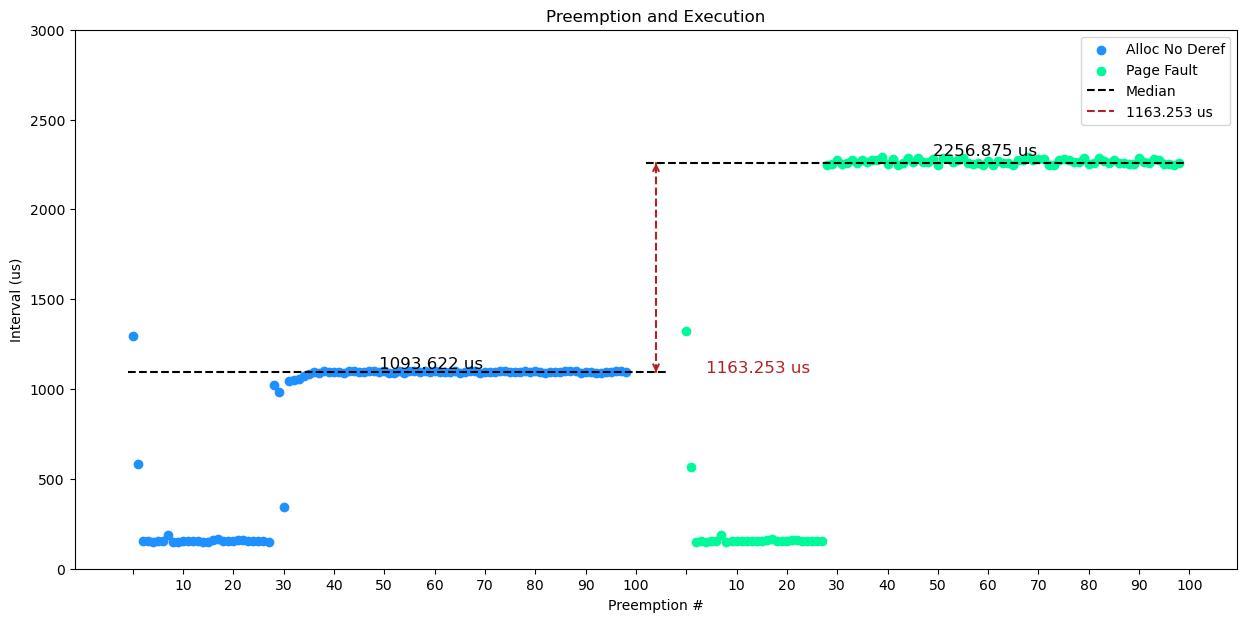

In [2]:
TIMESLICE_LENGTH = 1000
NUM_SAMPLES = 100
OFFSET = NUM_SAMPLES // 10

# def plot_ivls(left_ivls, right_ivls, left_label, right_label=None, 
#               right_label_list=None, dual=False,):
#   NUM_SAMPLES = 1000000
#   offset = NUM_SAMPLES // 10
#   if right_label_list is None:
#     right_label_list = [right_label for i in range(len(right_ivls))]
#   if dual:
#     for i, left, right in enumerate(zip(left_ivls, right_ivls)):
#       plot_side_by_side(noSharedData=left, sharedData=right, NUM_SAMPLES=NUM_SAMPLES, lowerBound=TIMESLICE_LENGTH+250, upperBound=TIMESLICE_LENGTH+500, 
#                         medianLines=True, offset=offset, firstLabel=left_label, secondLabel=right_label_list[i])  
#   else:
#     for i, ivls in enumerate(right_ivls):
#       plot_side_by_side(noSharedData=left_ivls, sharedData=ivls, NUM_SAMPLES=NUM_SAMPLES, lowerBound=TIMESLICE_LENGTH+250, upperBound=TIMESLICE_LENGTH+500, 
#                         medianLines=True, offset=offset, firstLabel=left_label, secondLabel=right_label_list[i])
ivls_dict = {
  "Alloc No Deref": 0,
  "Alloc Deref": 1,
  "Page Fault": 2,
  "Shared": 3,
  "Crashed": 4
}


plot_side_by_side(noSharedData=ivls[ivls_dict["Alloc No Deref"]], sharedData=ivls[ivls_dict["Page Fault"]], NUM_SAMPLES=NUM_SAMPLES, lowerBound=0, upperBound=TIMESLICE_LENGTH*3, 
                    medianLines=True, offset=OFFSET, firstLabel="Alloc No Deref", secondLabel="Page Fault",
                    lowerTextOffset=1, upperTextOffset=10)

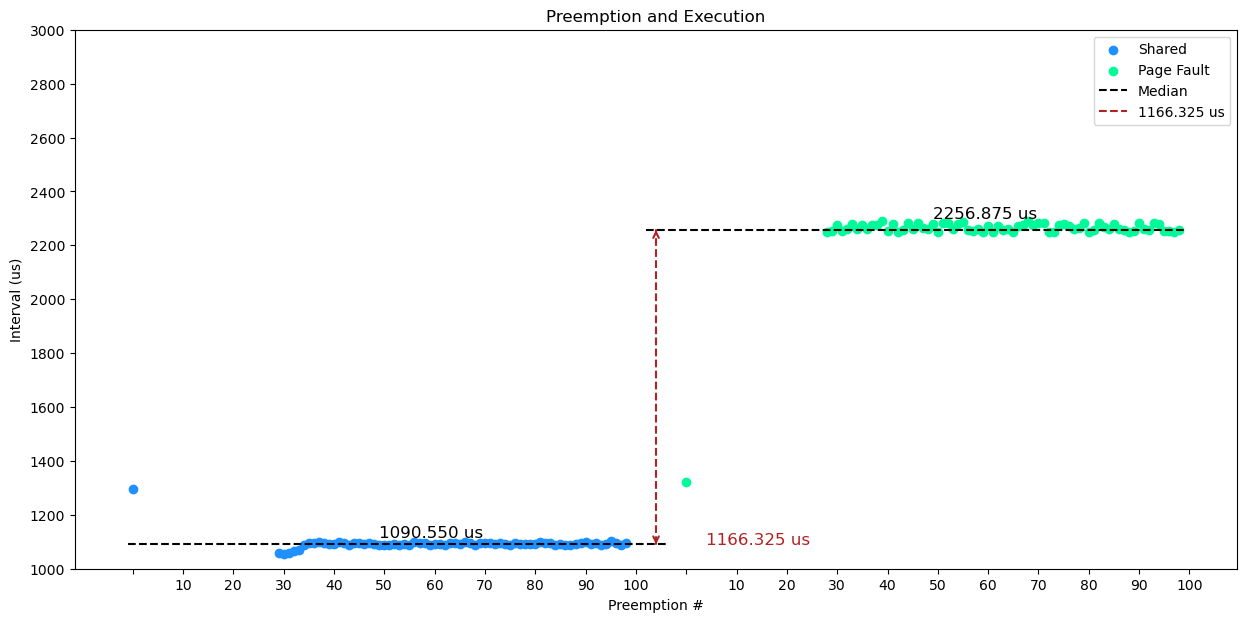

In [3]:
plot_side_by_side(noSharedData=ivls[ivls_dict["Shared"]], sharedData=ivls[ivls_dict["Page Fault"]], NUM_SAMPLES=NUM_SAMPLES, lowerBound=TIMESLICE_LENGTH, upperBound=TIMESLICE_LENGTH*3, 
                    medianLines=True, offset=OFFSET, firstLabel="Shared", secondLabel="Page Fault",
                    lowerTextOffset=1, upperTextOffset=10)

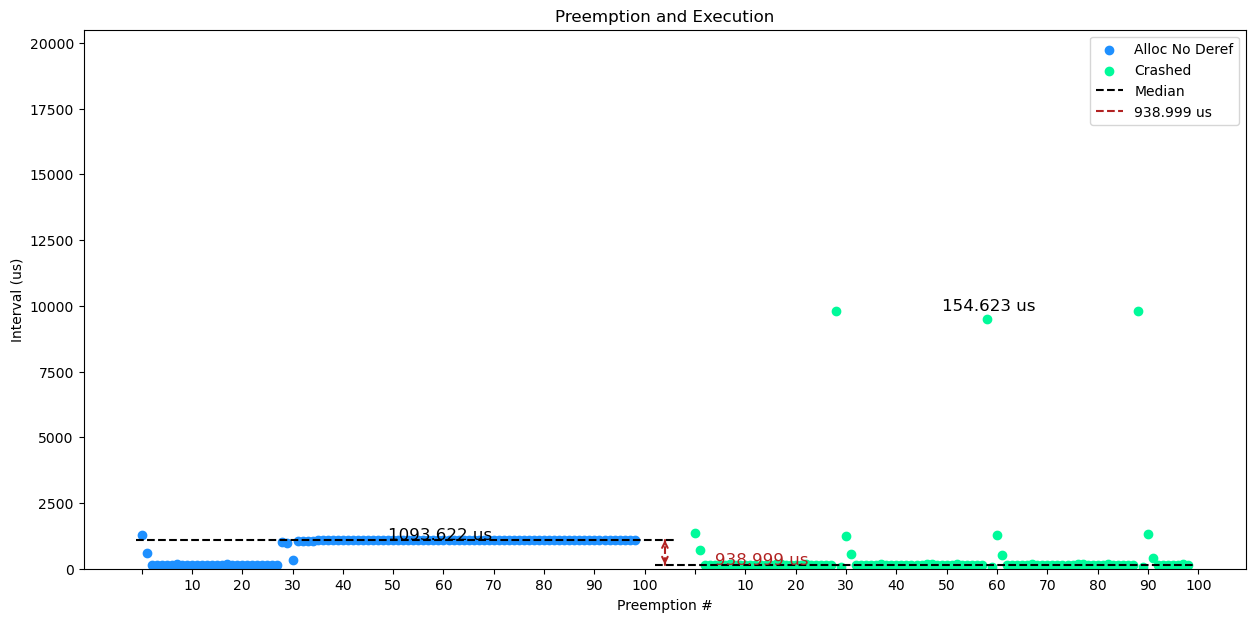

In [4]:
plot_side_by_side(noSharedData=ivls[ivls_dict["Alloc No Deref"]], sharedData=ivls[ivls_dict["Crashed"]], NUM_SAMPLES=NUM_SAMPLES, lowerBound=0, upperBound=20*TIMESLICE_LENGTH+500, 
                    medianLines=True, offset=OFFSET, firstLabel="Alloc No Deref", secondLabel="Crashed",
                    lowerTextOffset=1, upperTextOffset=10)